# Black_friday_Exploration_Data_Analysis

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


# **Problem Statement**

Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
#importing the train_dataset
df_train = pd.read_csv('train_dataset.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.shape

(550068, 12)

In [5]:
#importing the test_dataset
df_test = pd.read_csv('test_dataset.csv')
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df_test.shape

(233599, 11)

In [7]:
# Append the above two dataset
df = df_train.append(df_test)
df.head()

C:\Users\Shreya\AppData\Local\Temp\ipykernel_25720\1146085210.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df.shape

(783667, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
df.drop(['User_ID'],axis=1,inplace=True)


In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


**Handling  categorial column using map function and label encoding**

In [13]:
# Handling categorial column 'Gender'
# using mapping in gender column to convert M ,F into 0 or 1
df['Gender']= df['Gender'].map({'F':1, 'M':0})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# unique( ) to find unique categorial columns
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
# Handling categorial column "Age"
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [16]:
#Label Encoding Second Method
 #Import label encoder
from sklearn import preprocessing
  
 #label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
 #Encode labels in column 'Age'.
df['Age']= label_encoder.fit_transform(df['Age'])
  
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0


In [44]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [45]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [46]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,6,16,C,4,0,8,8.0,16.0,7969.0,0,1


In [47]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [48]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,7969.0,0,1


**Handling  Missing Values**

In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [19]:
# Product_category_2 having Discrete Number so null_values handle by only mode function
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [33]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [23]:
df['Product_Category_2'].mode()[0]

8.0

In [24]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df['Product_Category_2'].isnull().sum()

0

In [31]:
df['Product_Category_3'].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [34]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [27]:
df['Product_Category_3'].mode()[0]

16.0

In [28]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df['Product_Category_3'].isnull().sum()

0

In [37]:
df.shape

(783667, 11)

In [38]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

C:\Users\Shreya\AppData\Local\Temp\ipykernel_25720\1828390438.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,1,0,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,0,6,16,C,4,0,8,8.0,16.0,7969.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 71.7+ MB


In [41]:
#Stay_In_Current_City_Years is object dtype now change into int type
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 68.8+ MB


In [49]:
df['B']= df['B'].astype(int)
df['C']= df['C'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


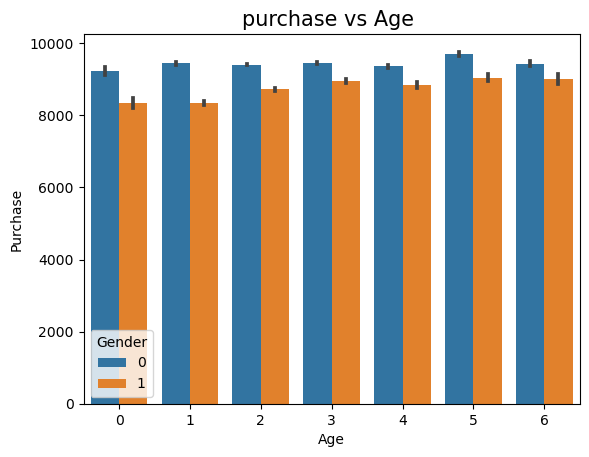

In [56]:
import seaborn as sns
sns.barplot('Age', 'Purchase', hue='Gender', data = df)
plt.title("purchase vs Age ", fontsize= 15)
plt.show()

**Observation: Purchasing via male is higher than female.**

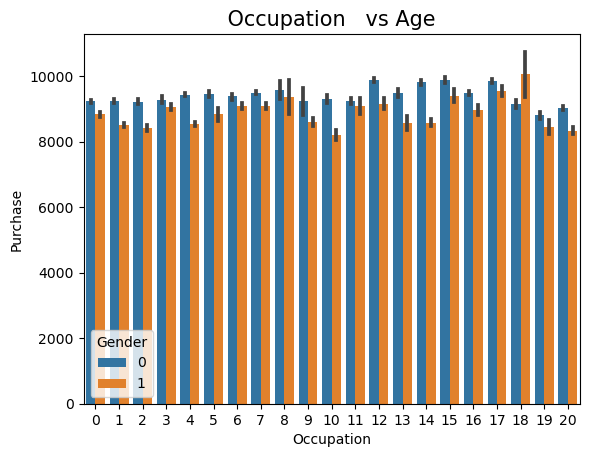

In [58]:

sns.barplot('Occupation', 'Purchase', hue='Gender', data = df)
plt.title(" Occupation vs Age ", fontsize= 15)
plt.show()

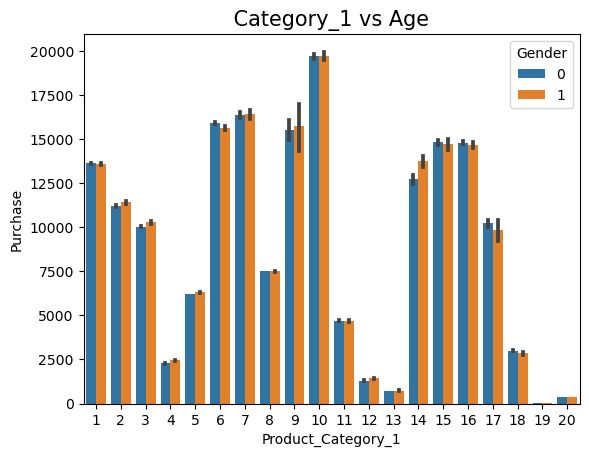

In [62]:
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data = df)
plt.title(" Category_1 vs Age ", fontsize= 15)
plt.show()

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


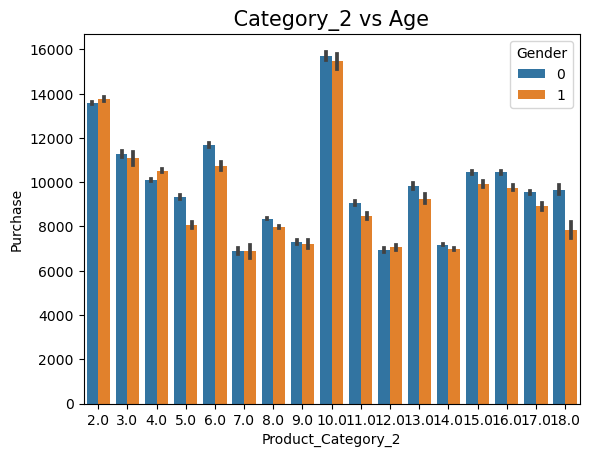

In [63]:
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data = df)
plt.title(" Category_2 vs Age ", fontsize= 15)
plt.show()

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


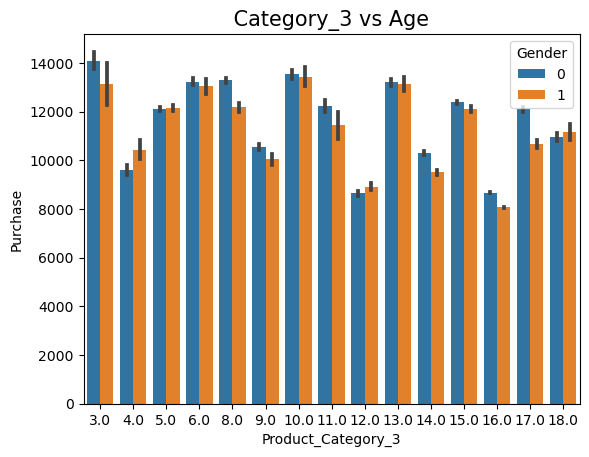

In [64]:
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data = df)
plt.title(" Category_3 vs Age ", fontsize= 15)
plt.show()

In [65]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [66]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [67]:
df_train=df[~df['Purchase'].isnull()]

In [68]:
X=df_train.drop('Purchase',axis=1)

In [69]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,0,1


In [70]:
X.shape

(550068, 11)

In [71]:
y=df_train['Purchase']

In [72]:
y.shape

(550068,)

In [73]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [75]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [76]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [77]:
## train ur model